In [1]:
import pandas as pd
from scipy.special import softmax
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import matplotlib.pyplot as plt


pd.set_option('display.max_colwidth', None)

# Load Rotten Tomatoes reviews
reviews = pd.read_csv('/Users/danielebelmiro/Data_Analytics_Bootcamp/Rotten/clean_reviews.csv')

In [2]:
reviews.iloc[439863]

id                                                                                                                   lina_from_lima
title                                                                                                                Lina From Lima
reviewId                                                                                                                    2638012
creationDate                                                                                                             2019-10-22
criticName                                                                                                         Josefina Sartora
isTopCritic                                                                                                                   False
reviewState                                                                                                                   fresh
publicatioName                                                              

In [3]:
# Select a random sample of 100 reviews
sample_reviews = reviews.sample(n=100, random_state=42)

print(sample_reviews.head())

                                                                       id  \
439863                                                     lina_from_lima   
1310710  the_fog_of_war_eleven_lessons_from_the_life_of_robert_s_mcnamara   
1099553                                                  1105979-brothers   
63988                                                      secret_of_nimh   
493706                                      the_kindergarten_teacher_2018   

                            title  reviewId creationDate        criticName  \
439863             Lina From Lima   2638012   2019-10-22  Josefina Sartora   
1310710            The Fog of War   1242001   2004-01-23       Roger Ebert   
1099553              The Brothers    199028   2001-03-22        Dave White   
63988          The Secret of NIMH    744482   2002-07-26  Jeffrey Westhoff   
493706   The Kindergarten Teacher   2518933   2018-10-15   Betty Jo Tucker   

         isTopCritic reviewState                       publicatioNam

In [4]:
MODEL = "j-hartmann/emotion-english-distilroberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/Users/danielebelmiro/anaconda3/lib/python3.11/site-packages/transformers/utils/generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


In [5]:
def mooder(text):
    encoded_text = tokenizer(text, return_tensors="pt")
    output = model(**encoded_text)
    scores = output.logits[0].detach().numpy()
    probabilities = softmax(scores)
    sc_label = {
        "anger": probabilities[0],
        "disgust": probabilities[1],
        "fear": probabilities[2],
        "joy": probabilities[3],
        "neutral": probabilities[4], 
        "sadness": probabilities[5],
        "surprise": probabilities[6]
    }
    sorted_scores = sorted(sc_label.items(), key=lambda item: item[1], reverse=True)
    
    total_score = sum(score for mood, score in sorted_scores if mood != "neutral")
    
    top_moods = []
    for mood, score in sorted_scores:
        if mood != "neutral":
            percentage = (score / total_score) * 100
            top_moods.append((mood, percentage))
        if len(top_moods) == 3:
            break
    
    return top_moods

In [6]:
sample_reviews['predicted_moods'] = sample_reviews['cleanedReviewText'].apply(mooder)

In [7]:
sample_reviews[['cleanedReviewText', 'predicted_moods']]

,cleanedReviewText,predicted_moods
439863,A great creative and hilarious idea we leave the film singing despite the pain Full Review in Spanish,"[(joy, 97.07233129577308), (sadness, 1.42506073966625), (surprise, 0.8803388688432031)]"
1310710,The effect of The Fog of War is to impress upon us the frailty and uncertainty of our leaders,"[(fear, 84.50910415816418), (sadness, 9.686666716014798), (disgust, 3.322816927150803)]"
1099553,It seems as though the entire budget of this movie was spent on expensive set decoration,"[(surprise, 51.95420358392431), (disgust, 21.123198065524054), (sadness, 14.791352294288874)]"
63988,It took years before Disney would match the quality of this first film from expatriate Don Bluth,"[(surprise, 77.03551311463444), (joy, 7.633716402265603), (sadness, 6.0054020900350755)]"
493706,Maggie Gyllenhaal and Parker Sevaks interactions come across seamlessly here Its fascinating to watch them together regardless of how questionable the situations become,"[(joy, 84.77758113030191), (surprise, 11.10911492918151), (fear, 1.7762611921247469)]"
...,...,...
811338,WilsonStiller comedy revamps a 1970s TV show for a few laughs but just a few,"[(joy, 63.47193644405017), (sadness, 21.89807218222032), (surprise, 10.348920528847875)]"
1231422,Atomic Blonde has a short fuse and packs a big bang,"[(surprise, 74.8906547634493), (anger, 11.86721612509383), (joy, 7.327472586070667)]"
1031301,Its a hard film to recommend but it works on its own gutsily perturbing terms,"[(disgust, 60.792398380506626), (anger, 26.80088945053748), (sadness, 8.016300928121979)]"
1163994,A study guide for celebrity bodyguards,"[(fear, 35.38293815687476), (surprise, 27.364640656888756), (disgust, 16.327913021690215)]"


sadness     60
joy         59
surprise    57
disgust     56
fear        36
anger       32
Name: count, dtype: int64


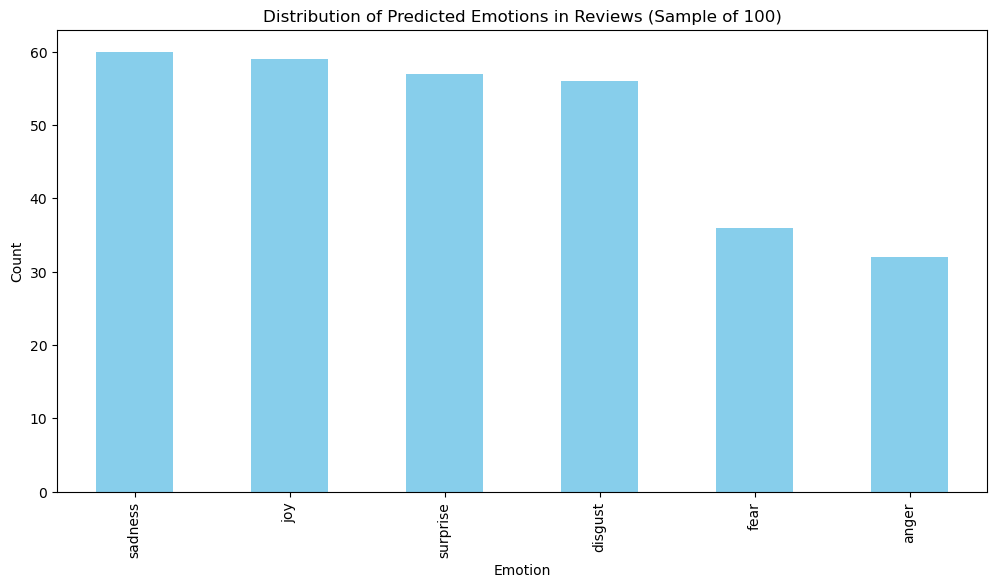

In [8]:
# Create a list of all predicted emotions
all_predicted_moods_sample = [mood for moods in sample_reviews['predicted_moods'] for mood, _ in moods]

# Count the predicted emotions
emotion_counts_sample = pd.Series(all_predicted_moods_sample).value_counts()
print(emotion_counts_sample)

# Plot the counts of predicted emotions
plt.figure(figsize=(12, 6))
emotion_counts_sample.plot(kind='bar', color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Predicted Emotions in Reviews (Sample of 100)')
plt.show()

In [9]:
sample_reviews['title'].unique()

array(['Lina From Lima', 'The Fog of War', 'The Brothers',
       'The Secret of NIMH', 'The Kindergarten Teacher',
       'Did You Hear About the Morgans?', 'Outside In',
       'Bardo, False Chronicle of a Handful of Truths',
       'We Can Be Heroes', 'The Last Temptation of Christ',
       'Christmas With the Kranks', 'A League of Their Own', 'Master',
       'Bone Tomahawk', 'Twin Falls Idaho', 'Michael', 'The DUFF',
       'Let Me In', 'The Thin Man', 'The Black Dahlia', 'The Mummy',
       'Vision: From the Life of Hildegard von Bingen', 'Flee',
       'BlacKkKlansman', 'Terms of Endearment', 'Golden Door', 'Pankh',
       'The Unbearable Weight of Massive Talent', 'Red Eye',
       'Ali: Fear Eats the Soul', 'Analyze That', 'Enter the Void',
       'Chef Flynn', 'A Quiet Place', 'The Pursuit of Happyness',
       'London Kills Me', 'Mannequin', 'The Violin', 'Sparkle',
       'My Bloody Valentine', 'Trouble the Water', 'In the Mood for Love',
       "Yocho 'Foreboding'", 'The E

In [10]:
# Function to aggregate emotion percentages
def aggregate_moods(moods_list):
    mood_dict = {}
    for moods in moods_list:
        for mood, percentage in moods:
            if mood in mood_dict:
                mood_dict[mood] += percentage
            else:
                mood_dict[mood] = percentage
    return mood_dict

# Group reviews by movie and aggregate predicted emotions
movie_emotion_profile = sample_reviews.groupby('title')['predicted_moods'].apply(list).apply(aggregate_moods).apply(pd.Series).fillna(0)

# Display emotional profiles of the first movies
print(movie_emotion_profile)

# Plot the emotional profile of a specific movie (example)
movie_title = 'Example Movie Title'
if movie_title in movie_emotion_profile.index:
    movie_emotion_profile.loc[movie_title].plot(kind='bar', color='skyblue')
    plt.xlabel('Emotion')
    plt.ylabel('Proportion')
    plt.title(f'Emotional Profile of {movie_title}')
    plt.show()
else:
    print(f'The movie "{movie_title}" was not found.')

                                                     joy   surprise  \
title                                                                 
A Good Person                                  94.790033   4.085268   
A League of Their Own                          82.557196   0.000000   
A Quiet Place                                  96.582623   0.000000   
Ali: Fear Eats the Soul                         0.000000   0.000000   
Analyze That                                    0.000000   0.000000   
...                                                  ...        ...   
Vision: From the Life of Hildegard von Bingen  98.170783   1.149297   
Wall Street: Money Never Sleeps                42.268364  12.825757   
We Can Be Heroes                               19.552520   0.000000   
When a Stranger Calls                           0.000000   0.000000   
Yocho 'Foreboding'                              0.000000  14.250077   

                                                   anger    disgust  \
title